<a href="https://colab.research.google.com/github/chrisnorth/rsudp_test/blob/main/obspy_test_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
  import obspy
except:
  !pip install obspy

# Restart the runtume
After installing obspy, you need to restart the runtime. Select the "Runtime" menu, and select "Restart runtime".

(This is due to a subtlety of how Google Colab works)

In [2]:
import obspy

Download the data

In [28]:
files={
    'Tenerife':{'url':'https://github.com/chrisnorth/rsudp_test/raw/main/data/query.mseed','filename':'Tenerife.mseed'},
    'Cardiff':{'url':'https://github.com/chrisnorth/rsudp_test/raw/main/data/query.mseed','filename':'Cardiff.mseed'}
}

In [14]:
name='Cardiff'
print(files[name]['url'],files[name]['filename'])

https://github.com/chrisnorth/rsudp_test/raw/main/data/query.mseed-version2 Cardiff.mseed


In [30]:
name='Cardiff'
import os
if not os.path.isfile(files[name]['filename']):
  command='wget {} -O {}'.format(files[name]['url'],files[name]['filename'])
  # command='wget '+files[name]['url']+' -O '+files[name]['filename']
  print('running command:',command)
  res=os.system(command)
  if res==0:
    print('file successfully dowloaded to {}'.format(files[name]['filename']))
  else:
    print('problem downloading from {}: {}'.format(files[name]['url'],res))
else:
  print('File already downloaded to {}'.format(files[name]['filename']))

running command: wget https://github.com/chrisnorth/rsudp_test/raw/main/data/query.mseed -O Cardiff.mseed
file dowloaded to Cardiff.mseed


Read in the test file

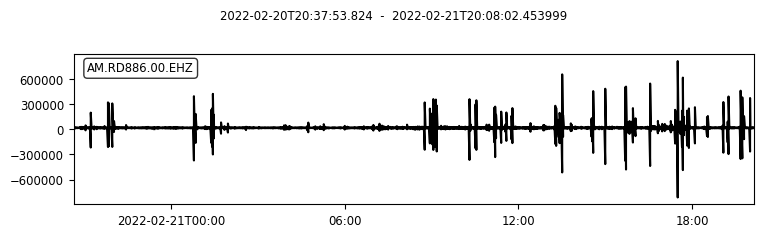

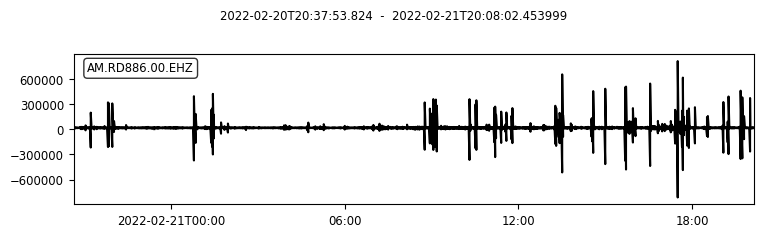

In [35]:
stream=obspy.read(files[name]['filename'])
stream.plot()

Plot a narrower time range

plotting from 2022-02-21T06:00:00.000000Z to 2022-02-21T08:00:00.000000Z


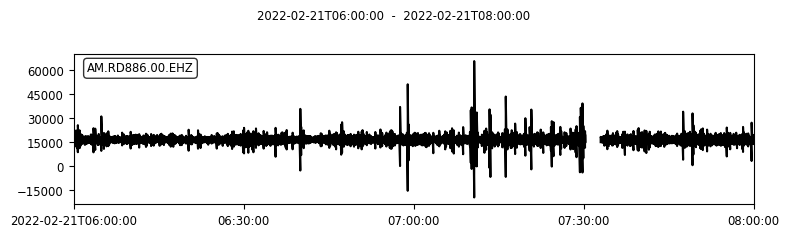

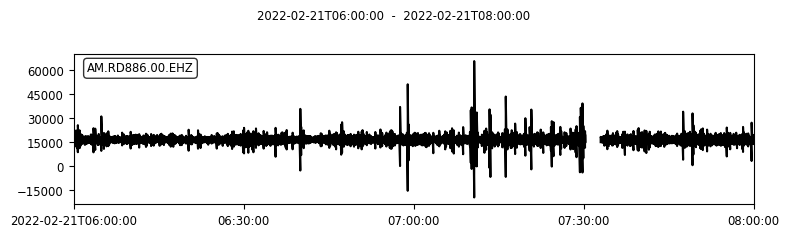

In [61]:
from datetime import datetime
# starttime=obspy.UTCDateTime('2022-02-21T06:00')
starttime=obspy.UTCDateTime(year=2022,month=2,day=21,hour=6)
endtime=obspy.UTCDateTime(year=2022,month=2,day=21,hour=8)
print('plotting from {} to {}'.format(starttime,endtime))
# endtime=obspy.UTCDateTime('2022-02-21T08:00')
stream.plot(starttime=starttime,endtime=endtime)